In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C://Users//aayushi solanki//OneDrive//googleplaystore.csv")

# Understanding the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.corr()  #since for now we have only one numeric column

,Rating
Rating,1.0


In [8]:
#number of unique values in each column

df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [9]:
#unique categories

df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
#unique types

df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [11]:
#uniqe rating

df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

# Data Cleaning

1. Check for null
2. Remove or Treat null values
3. Check duplicate 
4. Drop duplicate

In [12]:
#lets check if there ayny rating that is more than 5! that will basicallly be outlier!

df[df['Rating']>5]

#so there is one rating that is 19! Insane!
#Let's remove it!

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
#drop the outlier

df.drop(10472, inplace=True)


In [14]:
#let's check if it is removed

df.loc[10471:10475]

#so there is no outlier left in rating column

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

#### Treating null values using different techniques for different columns



In [16]:
#for content rating using backward fill technique to fill the null value

df['Content Rating'].bfill(inplace=True)

In [17]:
#Again using bfill technique to fill the missing value

df['Type'].bfill(inplace=True)

In [18]:
#for Rating we will use interpolate with linear method

df['Rating'] = df['Rating'].interpolate(method='linear')


In [19]:
#for current ver and android ver we will use mode 

df["Current Ver"].fillna((df["Current Ver"].mode().values[0]),inplace=True)

df["Android Ver"].fillna((df["Android Ver"].mode().values[0]),inplace=True)



In [20]:
#let's check if there remains any null values

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
#check if duplicate values exist

df.duplicated().sum()

474

In [22]:
#let's drop duplicate values and keep only first occurences

df= df.drop_duplicates()

In [23]:
#again, check if duplicate values exist

df.duplicated().sum()

0

In [24]:
#df shape after removing or treating null and duplicate values 

df.shape

(10366, 13)

## Univariate Analysis

  1. categorical data 
  2. Numerical data

#### 1. Categorical data

    1.1 Categories
    1.2 Type
    1.3 Genres
    1.4 Content Rating

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


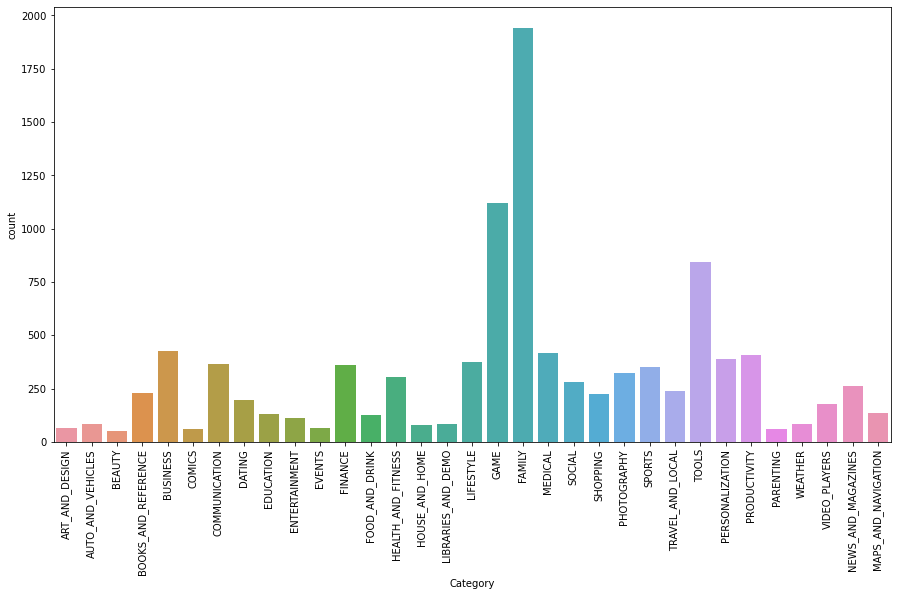

In [25]:
#1 category disteribution

plt.figure(figsize=(15,8))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

### Observation: Max number of apps belongs to family category


C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


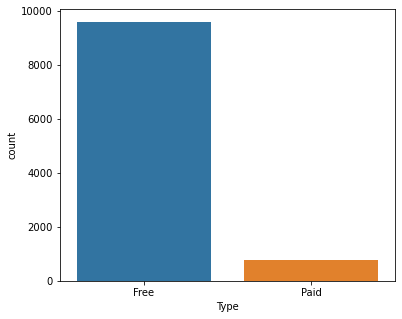

In [26]:
#2Type distribution 

plt.figure(figsize=(6,5))

sns.countplot(df['Type'])

plt.show()

### Observation: Maximum number of apps are free

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


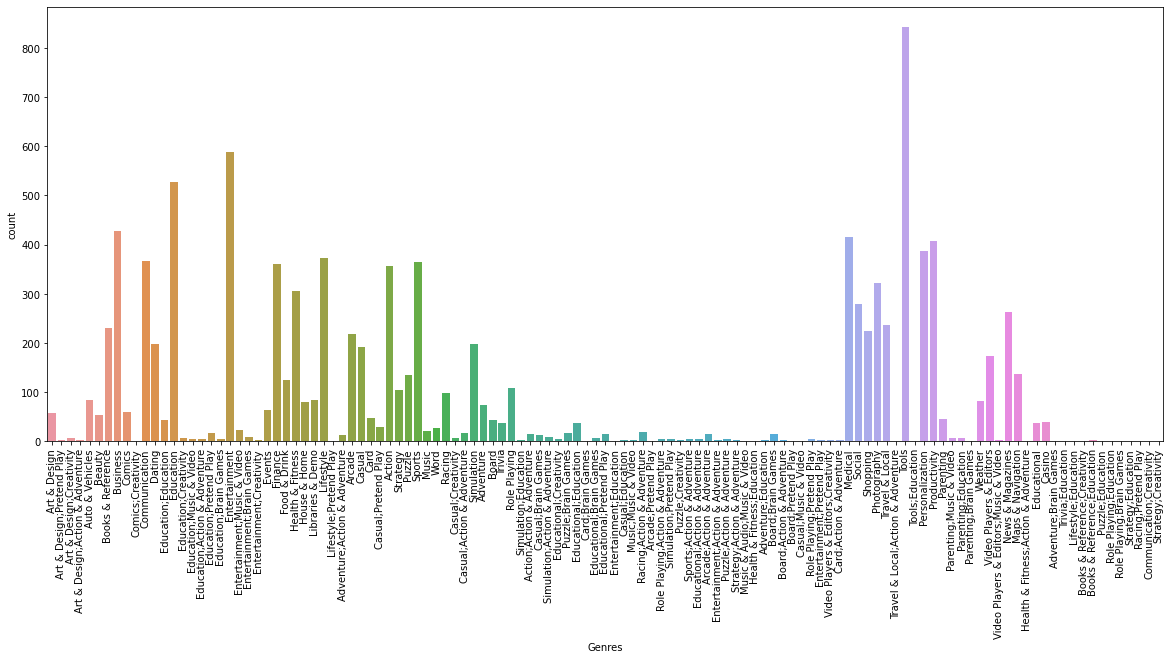

In [27]:
#3 genre distribution

plt.figure(figsize=(20,8))
sns.countplot(df['Genres'])
plt.xticks(rotation=90)
plt.show()

### observation: maximum number of apps belongs to Tools Education

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


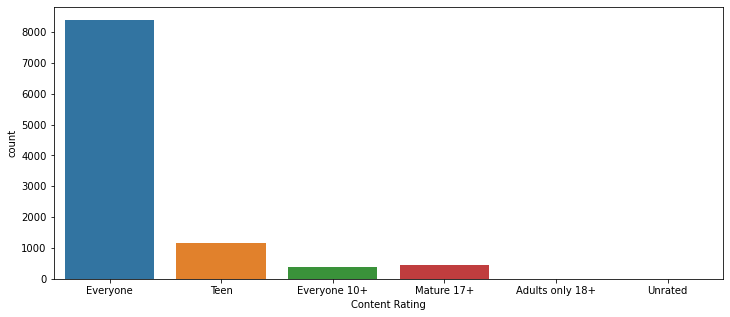

In [28]:
#4 Content Rating distribution

plt.figure(figsize=(12,5))

sns.countplot(df['Content Rating'])

plt.show()

### Observation: max = everyone!

In [29]:
#set sns theme palette and style

sns.color_palette("Spectral", as_cmap=True)

sns.set_style("whitegrid")

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

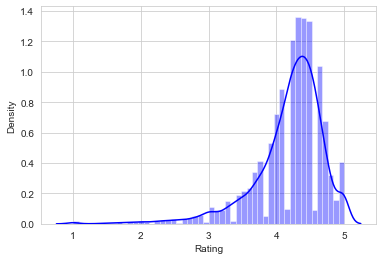

In [30]:
#distributon plot for rating

sns.distplot(df['Rating'], color='blue')

### Observation: the distribution of data has a longer tail on the left side(streched)

1. the majority of the data is concentrated on the right side 
2.  there are relatively fewer extreme values on the left side.
3. In this case, the data is skewed towards lower values.

#### Conversion of object  data type to numerical data for better data representation

In [31]:
#converting review 

df["Reviews"]=pd.to_numeric(df["Reviews"],errors="coerce")


In [32]:
#converting price:

df["Price"] = df["Price"].str.replace('$', '').str.replace(',','')
df["Price"] = pd.to_numeric(df["Price"])

In [33]:
#converting  Installs:

df["Installs"] = df["Installs"].str.replace('+', '').str.replace(',','')
df["Installs"] = pd.to_numeric(df["Installs"])

In [34]:
#converting Size:

df["Size"] = pd.to_numeric(df["Size"], errors='coerce')

In [35]:
#now that we have converted this columns let's check coorelation again

corelation = df.corr()

In [36]:
corelation

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063562,NaN,0.047113,-0.020434
Reviews,0.063562,1.000000,NaN,0.635006,-0.009430
Size,NaN,NaN,NaN,NaN,NaN
Installs,0.047113,0.635006,NaN,1.000000,-0.011162
Price,-0.020434,-0.009430,NaN,-0.011162,1.000000


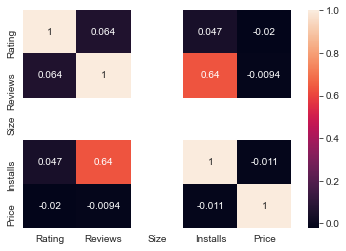

In [37]:
sns.heatmap(corelation,annot=True )
plt.show()

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='Installs'>

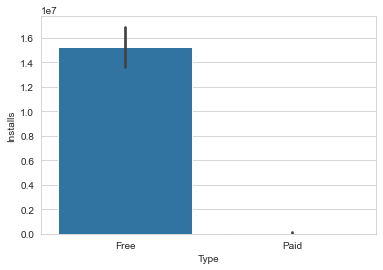

In [38]:
#installs on the bases of Types

sns.barplot(df['Type'], df['Installs'])

In [39]:
#Installs count on the bases of types

installs_types = df.groupby(df['Type'])['Installs'].count()

installs_types

Type
Free    9600
Paid     766
Name: Installs, dtype: int64

C:\Users\aayushi solanki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


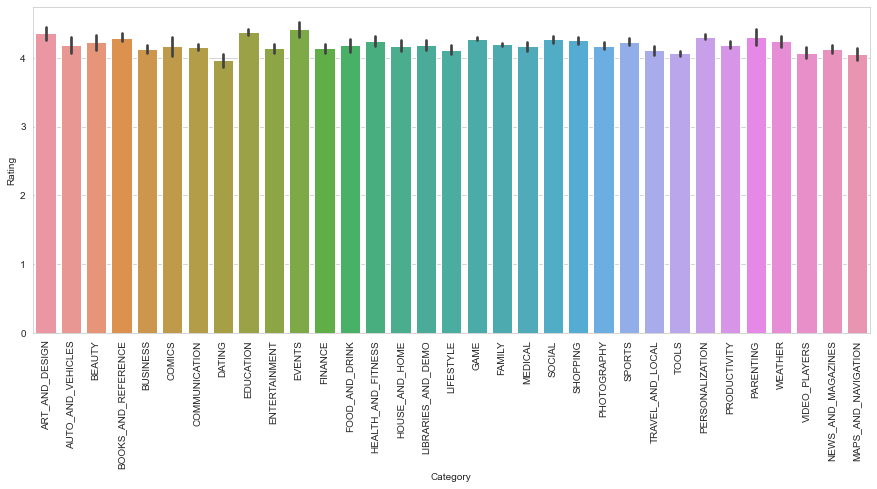

In [40]:
#

plt.figure(figsize=(15,6))

plt.xticks(rotation=90)

sns.barplot(df['Category'], df['Rating'])

plt.show()

#### Note since price is 0 here by default there is no sense checking the relationship of price with other attributes


# Explore more!

In [58]:
# Top 5 category by Installs

# Group the data by category and calculate the sum of installs for each category
category_installs = df.groupby('Category')['Installs'].sum()

# Sort the categories based on installs in descending order
sorted_categories = category_installs.sort_values(ascending=False)

# Get the top 5 categories
top_5_categories = sorted_categories.head(5)

# Print the top 5 categories
print(top_5_categories)


Category
GAME             31544024415
COMMUNICATION    24152276251
SOCIAL           12513867902
PRODUCTIVITY     12463091369
TOOLS            11452771915
Name: Installs, dtype: int64


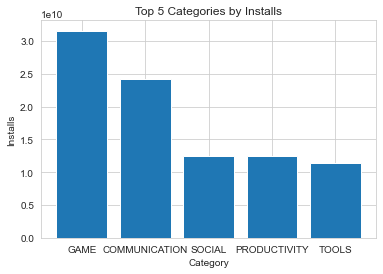

In [42]:
#let's visualise this:

# Plotting the bar chart
plt.bar(top_5_categories.index, top_5_categories.values)

# Axes labels and title
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Top 5 Categories by Installs')

# Display the chart
plt.show()


In [43]:
#Top 5 categories by ratings

# Group the data by category and calculate the sum of Ratings for each category
category_rating = df.groupby('Category')['Rating'].sum()

# Sort the categories based on rating in descending order
sorted_categories = category_rating.sort_values(ascending=False)

# Get the top 5 categories
top_5_categories = sorted_categories.head(5)

# Print the top 5 categories
print(top_5_categories)



Category
FAMILY      8148.564008
GAME        4795.915476
TOOLS       3423.990357
BUSINESS    1762.542063
MEDICAL     1729.975000
Name: Rating, dtype: float64


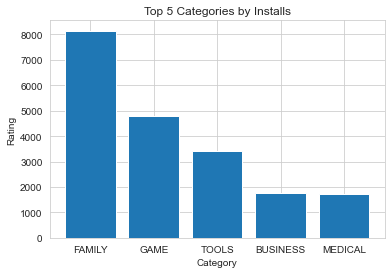

In [44]:
#Let's visulaise this:

plt.bar(top_5_categories.index, top_5_categories.values)

# Axes labels and title
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Top 5 Categories by Installs')

# Display the chart
plt.show()


In [45]:
#similarly on the bases of Reviews

#Top 5 categories by reviews

# Group the data by category and calculate the sum of reviews for each category
category_reviews = df.groupby('Category')['Reviews'].sum()

# Sort the categories based on installs in descending order
sorted_categories = category_reviews.sort_values(ascending=False)

# Get the top 5 categories
top_5_categories = sorted_categories.head(5)

# Print the top 5 categories
print(top_5_categories)



Category
GAME             1415536650
COMMUNICATION     601273552
SOCIAL            533576829
FAMILY            396771969
TOOLS             273185044
Name: Reviews, dtype: int64


Text(0.5, 1.0, 'Top 5 categories by Reviews')

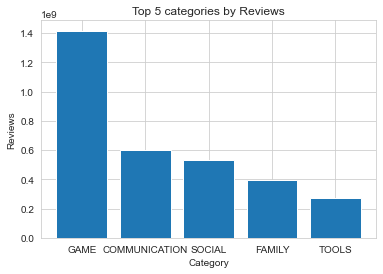

In [46]:
#let's visulaise this:

plt.bar(top_5_categories.index,top_5_categories.values )

plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Top 5 categories by Reviews')

In [47]:
#similarly on the bases of Reviews

#Top 5 categories by reviews

# Group the data by category and calculate the sum of reviews for each category
genres_reviews = df.groupby('Genres')['Reviews'].sum()

# Sort the categories based on installs in descending order
sorted_genres = genres_reviews.sort_values(ascending=False)

# Get the top 5 categories
top_5_genres = sorted_genres.head(5)

# Print the top 5 categories
print(top_5_genres)



Genres
Communication    601273552
Social           533576829
Casual           367220219
Action           313193086
Arcade           308758806
Name: Reviews, dtype: int64


In [48]:
#similarly on the bases of Rating

#Top 5 categories by Rating

# Group the data by category and calculate the sum of reviews for each category
genres_Rating = df.groupby('Genres')['Rating'].sum()

# Sort the categories based on installs in descending order
sorted_genres = genres_Rating.sort_values(ascending=False)

# Get the top 5 categories
top_5_genres = sorted_genres.head(5)

# Print the top 5 categories
print(top_5_genres)



Genres
Tools            3419.490357
Entertainment    2423.477698
Education        2248.759643
Business         1762.542063
Medical          1729.975000
Name: Rating, dtype: float64


In [49]:
#similarly on the bases of Installs

#Top 5 categories by Installs

# Group the data by category and calculate the sum of reviews for each category
genres_Installs = df.groupby('Genres')['Installs'].sum()

# Sort the categories based on installs in descending order
sorted_genres = genres_Installs.sort_values(ascending=False)

# Get the top 5 categories
top_5_genres = sorted_genres.head(5)

# Print the top 5 categories
print(top_5_genres)



Genres
Communication    24152276251
Social           12513867902
Productivity     12463091369
Tools            11442771915
Photography       9721247655
Name: Installs, dtype: int64


### number one category on the bases of:
1. Install - Game and Communication
2. Review - Game and Communication
3. Rating - Family and Game

### number one genre on the bases of:

1. Install - Communication and Social
2. Review -  Communication and Social
3. Rating - Tools and Entertainment 

# top apps on the bases of:

1. Installs  - Hangouts and Messenger, Maps, Instagram, Gmail
2. Reviews - Facebook, Whatsapp, Instagram
3. Ratings - CheowethAH and ESBilling System etc.
4. Last Updated - Kim Bu Youtuber?
5. Size 
        5.1 Max 
        5.2 MIn
6. Price 
        6.1 Max 
        6.2 Min
7. Android Version (Mode) - 4.0

In [50]:
#Ratings

top_5_apps=df.sort_values("Rating",ascending=False)
top_5_apps[["App","Rating"]].head(5)

,App,Rating
5139,Chenoweth AH,5.0
9810,ES Billing System (Offline App),5.0
9411,NEMA ei,5.0
9427,ei Calc,5.0
8234,DB Pickles,5.0


In [51]:
#app and reviews

top_5_apps=df.sort_values("Reviews",ascending=False)
top_5_apps[["App","Reviews"]].head(5)

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446


In [52]:
#app and installs

top_5_apps = df.sort_values("Installs",ascending=False)
top_5_apps[["App","Installs"]].head(5)

,App,Installs
341,Hangouts,1000000000
382,Messenger – Text and Video Chat for Free,1000000000
4098,Maps - Navigate & Explore,1000000000
2604,Instagram,1000000000
451,Gmail,1000000000


In [53]:
#Last Updated

top_5_apps = df.sort_values("Last Updated",ascending=False)
top_5_apps[["App","Last Updated"]].head(5)

,App,Last Updated
6834,Kim Bu Youtuber?,"September 9, 2017"
10393,SnowMobile Parking Adventure,"September 9, 2016"
9437,EI国际,"September 9, 2016"
6983,Best Friends Dress Up & Makeup,"September 9, 2015"
7920,Family Savings CU Mobile,"September 8, 2017"


In [54]:
#Last_Updated

df[['App','Android Ver']].max()

App            🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Android Ver                                  Varies with device
dtype: object

In [55]:
#apps which have minimum number of size

top_5_apps = df.sort_values("Size")
top_5_apps[["App","Size"]].head(5)

,App,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,NaN
1,Coloring book moana,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",NaN
3,Sketch - Draw & Paint,NaN
4,Pixel Draw - Number Art Coloring Book,NaN


In [56]:
#app which is most seen by adults with maximum number of Ratings

a4=df[df["Content Rating"]=="Mature 17+"]
a4=a4.groupby(["Genres"])[["Reviews"]].count().reset_index().sort_values(by=["Reviews"],ascending=False)
a4.head()

,Genres,Reviews
10,Dating,170
27,Social,59
0,Action,50
12,Entertainment,40
18,News & Magazines,13
